In [2]:
import pandas as pd
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_10lac
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
from sklearn.preprocessing import LabelEncoder
label_company = LabelEncoder()
label_job = LabelEncoder()
label_degree = LabelEncoder()


In [4]:
label_company.fit_transform(df.company)

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [6]:
label_job.fit_transform(df.job)

array([2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1])

In [7]:
label_degree.fit_transform(df.degree)

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [8]:
df.company=label_company.fit_transform(df.company)
df.job=label_job.fit_transform(df.job)
df.degree=label_degree.fit_transform(df.degree)

In [11]:
df.head()

,company,job,degree,salary_more_then_10lac
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [9]:
x=df.drop("salary_more_then_10lac",axis=1)
y=df.salary_more_then_10lac

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
yp=model.predict(x_test)
yp

array([0, 1, 1, 1, 1], dtype=int64)

In [15]:
y_test

1     0
4     0
5     1
13    1
8     0
Name: salary_more_then_10lac, dtype: int64

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
cm

array([[1, 2],
       [0, 2]], dtype=int64)

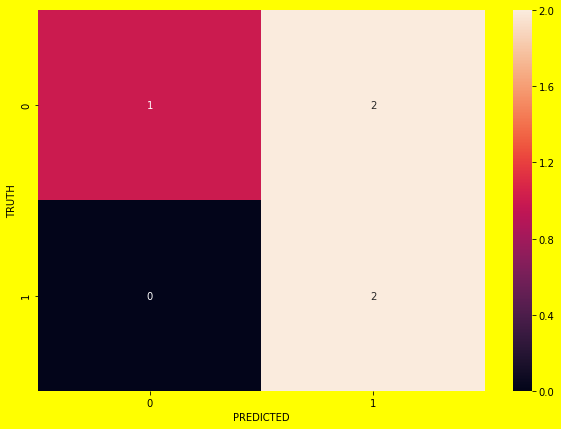

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(facecolor='yellow',figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")
plt.show()

In [24]:
model.score(x_train,y_train)

1.0